In [1]:
# XOR 은 Chap8 근난 이후에 해볼것
# 활성화 함수
# 뉴런을 입력 받아 연산결과를 다음 뉴런으로 전달할 때
# 임계점이 넘을 경우만 신호를 전달하는 체계
# Activation Function이라 한다
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Step Function')

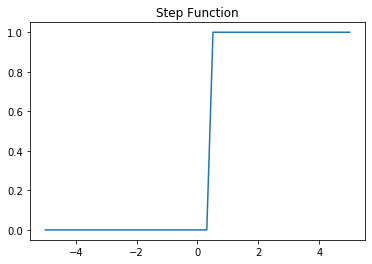

In [2]:
# 계단 함수-가장 단순한 형태
# 분기점을 넘으면 값이 증가
# 분기점에 도달하지 않으면 0 -> 출력하지 않음
def step_function(x, threshold=0):
    # x: 입력, threshold: 분기점
    return np.where(x <= threshold, 0 ,1)

# 시각화를 위한 선형 공간 생성
x = np.linspace(-5, 5) 
y = step_function(x, threshold=0.5)

plt.plot(x, y)
plt.title("Step Function")

Text(0.5, 1.0, 'Sigmoid Function')

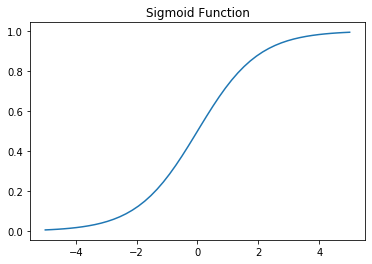

In [3]:
# sigmoid 함수
# Step 함수보다 부드러운 형태: 실제와 좀 더 닮아 있다
# 단순하지만 전통적으로 널리 사용되온 함수
# 로지스틱 함수
# 0~1 사이를 부드럽게 변화한다
# 신경망이 깊어지면 Gradient Vanishing 현상 발생
def sigmoid_function(x):
    # x는 입력값
    return 1 / (1 + np.exp(-x))
sigmoid_y = sigmoid_function(x)
plt.plot(x, sigmoid_y)
plt.title("Sigmoid Function")

Text(0.5, 1.0, 'Hyperboic Tangent')

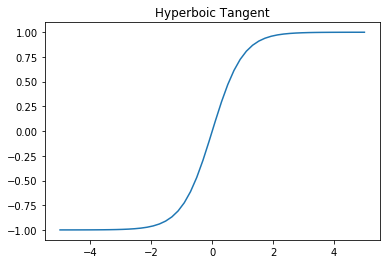

In [4]:
# tanh: 하이퍼블릭 탄젠트 함수
# Sigmoid 와 거의 비슷, 할성화 정도에 차이가 있음
def tanh_function(x):
    return np.tanh(x)

tanh_y = tanh_function(x)
plt.plot(x, tanh_y)
plt.title("Hyperboic Tangent")

Text(0.5, 1.0, 'ReLU Function')

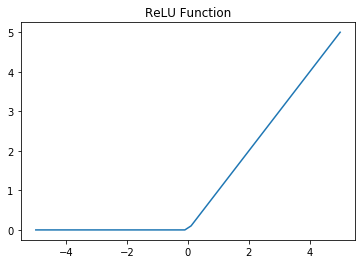

In [5]:
# ReLU: Reactified Linear Unit
# x > 0 범위 내에서 우상향 선형 곡선을 그린다
# 최근 딥러닝에서 많이 활용되는 활성화 함수
def relu_function(x):
    return np.where(x <=0, 0, x)

relu_y = relu_function(x)
plt.plot(x, relu_y)
plt.title("ReLU Function")

Text(0.5, 1.0, 'Leacky Relu Function')

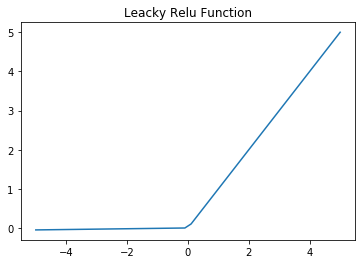

In [6]:
# Leacky ReLU
# ReLU 함수는 입력이 음수인 경우 출력이 0
# 전달되는 신호가 유실되므로 어이상 학습이 진행되지 않음
# dying Relu 현상
# 이 현상 해소를 위해 음수영역에서 약간의 기울기를 만듬
def leacky_relu_function(x):
    return np.where(x <= 0, x * 0.01, x)

leacky_relu_y = leacky_relu_function(x)
plt.plot(x, leacky_relu_y)
plt.title("Leacky Relu Function")

In [7]:
# Sortmax
# 분류 문제를 다룰 때 적합한 함수
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

source = [1, 2, 3]
result = softmax_function(source)
print("SOFTMAX:", result)
print("SUM:", sum(result))

SOFTMAX: [0.09003057 0.24472847 0.66524096]
SUM: 1.0


In [8]:
# 순전파 공부하다 다시 뉴런으로 돌아옴

출력:
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


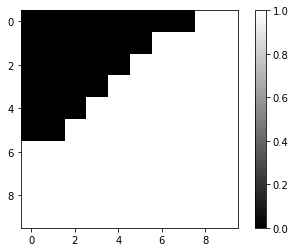

In [9]:
# 신경망을 활용한 XOR 문제 해결
# 좌표계 설정
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10)) # 격자

w_x = 2.5 # x의 가중치
w_y = 3.0 # y의 가중치

bias = 2.0 # 편향
# 그리드 맵에 뉴런의 연산을 출력
for i in range(10):
    for j in range(10):
        # 입력과 가중치 곱 + 편향
        u = X[i] * w_x + Y[j] * w_y + bias
        # 그리드 맵에 출력값 저장
        #y = sigmoid_function(u)
        y = step_function(u)
        
        Z[j][i] = y
print("출력:\n", Z)

# 그래프로 출력
plt.imshow(Z, #이미지 출력용데이터
           "gray" # 컬러 맵
          )
plt.colorbar()
plt.show()
# 검은색 영역은 출력이 0: 뉴런이 흥분하지 않은 상태
# 흰색 영역은 출력이 1: 뉴런이 흥분한 상태

In [12]:
# 신경망을 중첩하면 어떤 분류든 가능해지게 됨
X = np.arange(-1.0, 1.0, 0.2)
print(X)
Y = np.arange(-1.0, 1.0, 0.2)

# 출력 저장소
Z = np.zeros((10, 10))
w_i_h = np.array([
    [4.0, 4.0],
    [4.0, 4.0]
]) 
w_h_o = np.array([
    [1.0],
    [-1.0]
])
# 편향
# 은닉층 편향
b_i_h = np.array([3.0, -3.0])
# 출력층을 위한 편향
b_h_o = np.array([0.1])

[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01]


GRID:
 [[0.10667615 0.11473686 0.13221275 0.16895435 0.2414415  0.36803037
  0.54814068 0.74116003 0.89223209 0.97836824]
 [0.11473686 0.13221275 0.16895435 0.2414415  0.36803037 0.54814068
  0.74116003 0.89223209 0.97836824 1.00514825]
 [0.13221275 0.16895435 0.2414415  0.36803037 0.54814068 0.74116003
  0.89223209 0.97836824 1.00514825 0.97836824]
 [0.16895435 0.2414415  0.36803037 0.54814068 0.74116003 0.89223209
  0.97836824 1.00514825 0.97836824 0.89223209]
 [0.2414415  0.36803037 0.54814068 0.74116003 0.89223209 0.97836824
  1.00514825 0.97836824 0.89223209 0.74116003]
 [0.36803037 0.54814068 0.74116003 0.89223209 0.97836824 1.00514825
  0.97836824 0.89223209 0.74116003 0.54814068]
 [0.54814068 0.74116003 0.89223209 0.97836824 1.00514825 0.97836824
  0.89223209 0.74116003 0.54814068 0.36803037]
 [0.74116003 0.89223209 0.97836824 1.00514825 0.97836824 0.89223209
  0.74116003 0.54814068 0.36803037 0.2414415 ]
 [0.89223209 0.97836824 1.00514825 0.97836824 0.89223209 0.74116003
  0.5

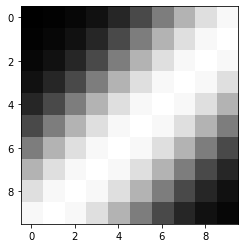

In [13]:
# 은닉층
def hidden_layer(x, w, b):
    u = np.dot(x, w) + b
    return sigmoid_function(u)

#출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

# 그리드 맵의 각 그리드 별 신경망 연산 수행
for i in range(10):
    for j in range(10):
        # 순전파
        inp = np.array([X[i],Y[j]]) # 입력층
#         print(inp)
        hid = hidden_layer(inp, w_i_h, b_i_h) # 은닉층
        #print(hid)
        out = output_layer(hid, w_h_o, b_h_o) # 출력층
#         print(out)
        # 그리드 맵에 신경망 출력값 저장
        Z[j][i] = out[0]

# 출력
print("GRID:\n", Z)
# 그리드 맵으로 출력
plt.imshow(Z, "gray")